# IMPORT

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pathlib import Path
import os
import pandas as pd
import seaborn as sns

# READFILE

In [2]:
col_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'num'
]

DATA = pd.read_csv(
    'Data/processed.cleveland.csv',
	encoding = 'latin1',
    names = col_names,
    header = None,
)

DATA.replace('?', pd.NA, inplace=True)

DATA['num'] = DATA['num'].apply(lambda x: 1 if x>0 else 0)

DATA

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
DATA.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


**Variable Description**<br>
1. age: age in years<br>
2. sex: gender of patient<br>
3. cp: chest pain type<br>
4. trestbps: resting blood pressure
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease

# ANYLIST FEATURES

In [4]:
print(DATA.columns.values)

['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'num']


**Categorial Features**<br>
Categorial :  'sex', 'fbs', and 'exang'.<br>
Ordinal: 'cp', 'restecg', 'slope', 'ca', 'thal' and 'num'.<br><br>
**Numeric Features**<br>
Continous: 'oldpeak'<br>
Discrete: 'age', 'trestbps', 'chol' and 'thalach'<br><br>

The question is is there any error features?

# DATA PREPROCESSING 

In [5]:
print("Missing Values per Column:")
print(DATA.isnull().sum())
print("------------------------------------")
print("Infinity Values per Column:")
print((DATA == np.inf).sum() + (DATA == -np.inf).sum())

Missing Values per Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
------------------------------------
Infinity Values per Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


The answers is **YES**, There are some patients don't have 'ca' or 'thal' on this dataset. We will erase those all rows and collumns that is contains an error value.

In [6]:
df_clean = DATA.dropna()
df_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


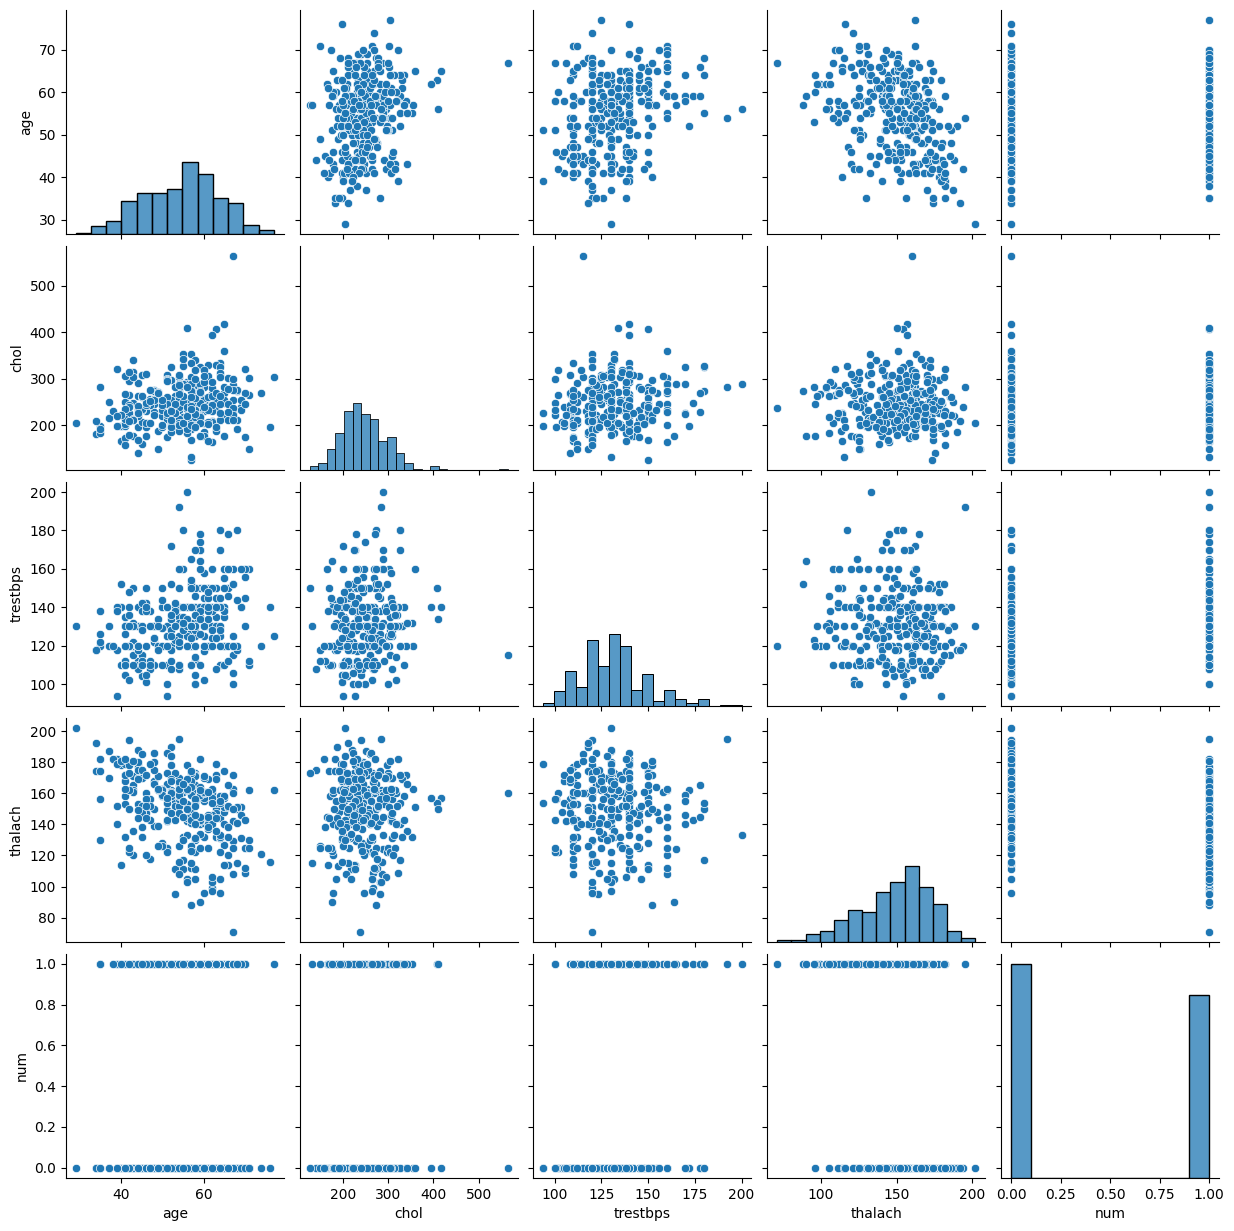

In [7]:
sns.pairplot(data = df_clean,vars=['age', 'chol', 'trestbps','thalach','num'])
plt.show()

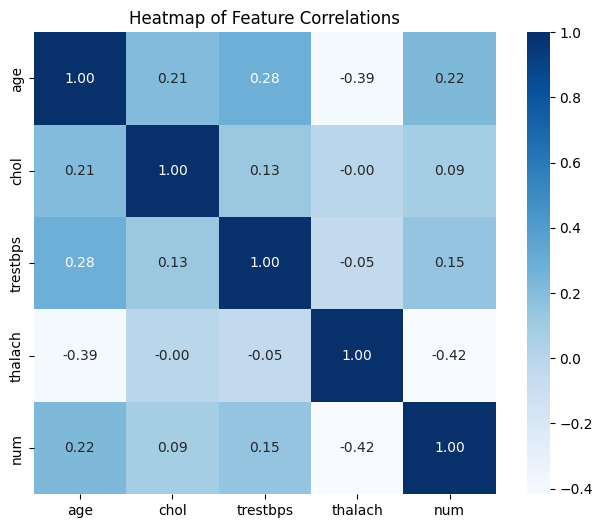

In [8]:
selected_columns = ['age', 'chol', 'trestbps','thalach','num']
corr = DATA[selected_columns].corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", square=True)
plt.title('Heatmap of Feature Correlations')
plt.show()

# ANYLIST CATEGORICAL DATA

In [9]:
import matplotlib.pyplot as plt
def histogram(variable):
    """
    input: variable ex:"Age"
    output: histogram & value count
    """
    # get feature
    var = DATA[variable]

    # count number of continuous variable
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize=(8,3))
    plt.hist(var, bins=20, color='blue', alpha=0.7)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

    print("{}: \n{}".format(variable, varValue))

def bar_plot(variable):
    """
    input: variable ex:"Sex"
    output: bar plot & value count
    """
    # get feature
    var = DATA[variable]

    # count number of categorical variable
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize=(8,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

    print("{}: \n{}".format(variable, varValue))

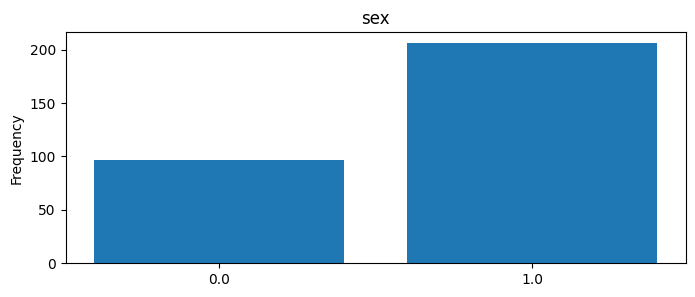

sex: 
sex
1.0    206
0.0     97
Name: count, dtype: int64


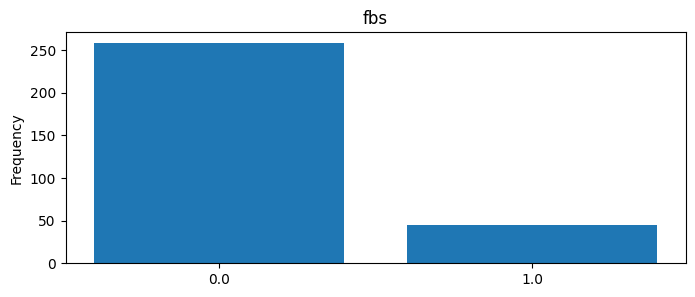

fbs: 
fbs
0.0    258
1.0     45
Name: count, dtype: int64


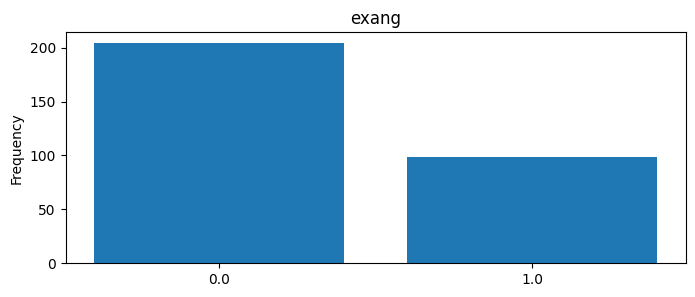

exang: 
exang
0.0    204
1.0     99
Name: count, dtype: int64


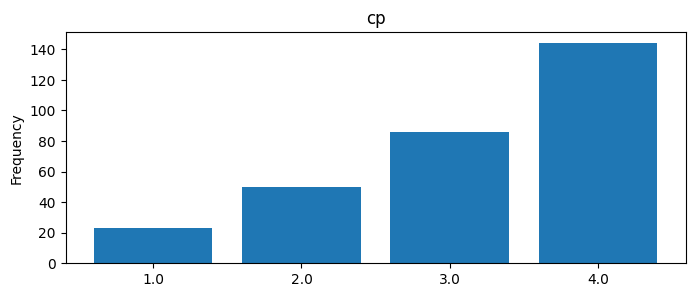

cp: 
cp
4.0    144
3.0     86
2.0     50
1.0     23
Name: count, dtype: int64


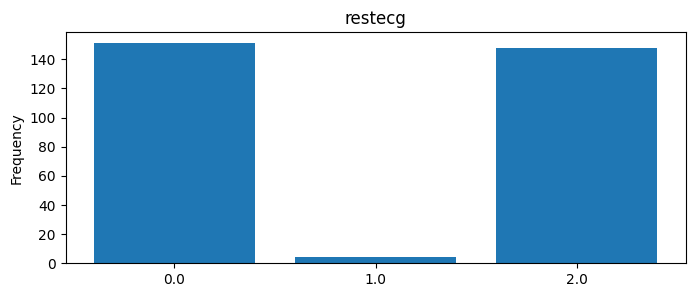

restecg: 
restecg
0.0    151
2.0    148
1.0      4
Name: count, dtype: int64


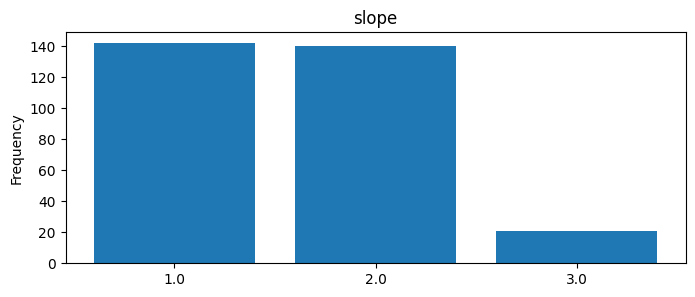

slope: 
slope
1.0    142
2.0    140
3.0     21
Name: count, dtype: int64


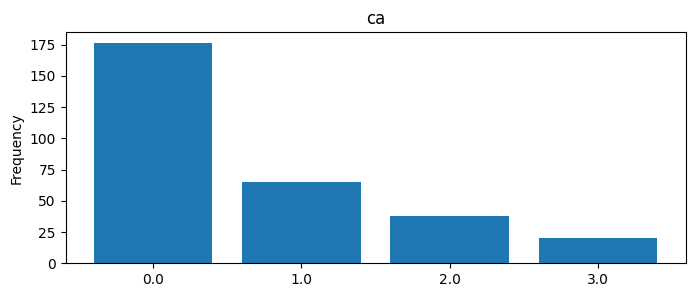

ca: 
ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64


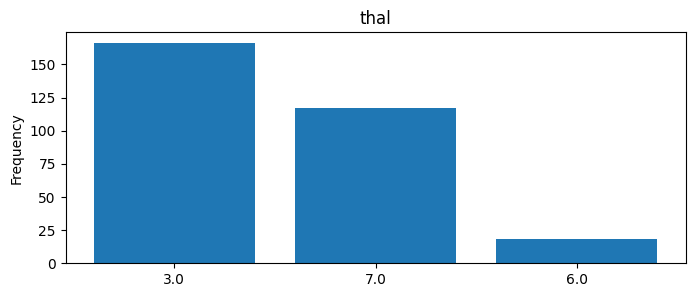

thal: 
thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64


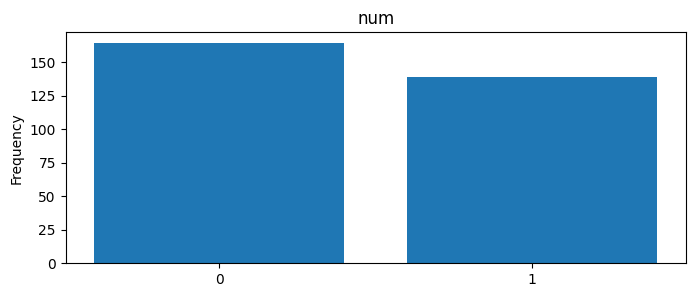

num: 
num
0    164
1    139
Name: count, dtype: int64


In [10]:
category1=['sex', 'fbs', 'exang','cp','restecg', 'slope', 'ca', 'thal', 'num']
for c in category1:
    bar_plot(c)

# ANYLIST NUMERICAL DATA

In [11]:
def plot_hist(variable):
    plt.figure(figsize=(8,3))
    plt.hist(DATA[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribituon with hist".format(variable))
    plt.show()

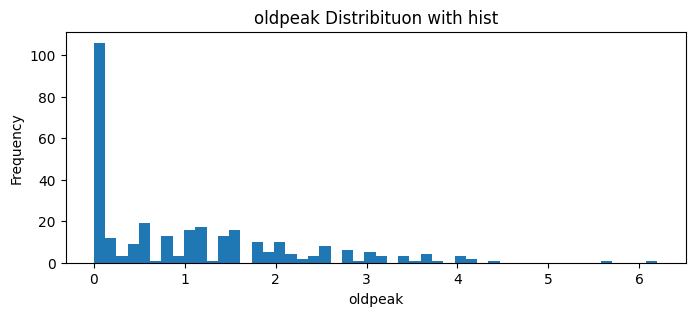

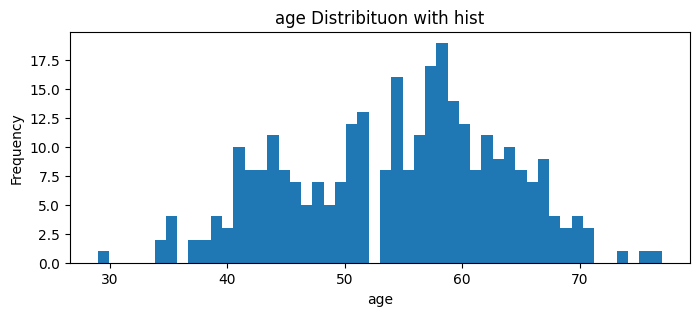

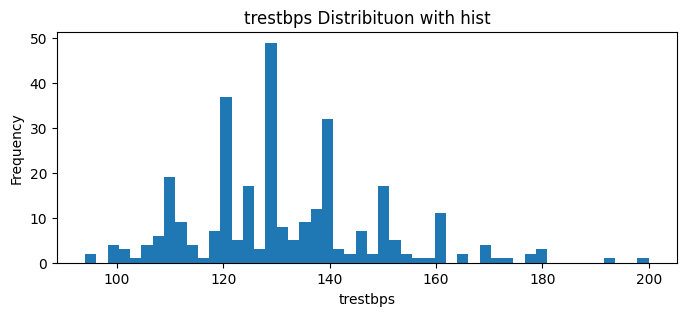

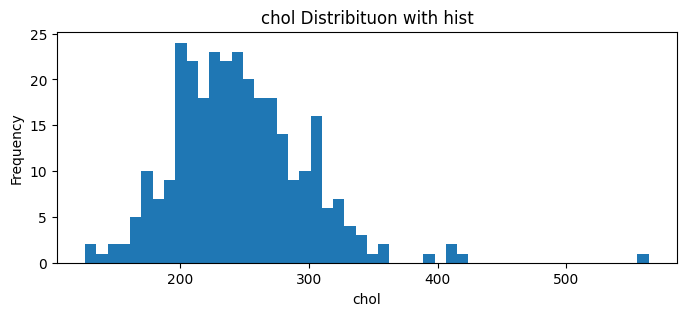

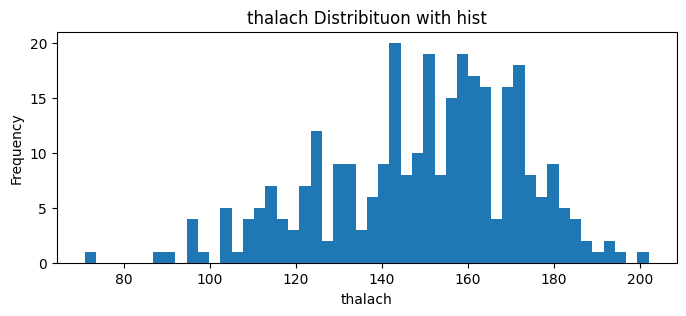

In [12]:
numericVar=['oldpeak', 'age', 'trestbps', 'chol', 'thalach']
for n in numericVar:
    plot_hist(n)

# BASIC DATA ANYLIST

In this section I will use some Categorial Features to anylist and create a simple rating table for those features

In [13]:
DATA[["sex","num"]]

,sex,num
0,1.0,0
1,1.0,1
2,1.0,1
3,1.0,0
4,0.0,0
...,...,...
298,1.0,1
299,1.0,1
300,1.0,1
301,0.0,1


In [14]:
DATA[["sex","num"]].groupby(["sex"],as_index = False).mean().sort_values(by='num', ascending=False)

,sex,num
1,1.0,0.553398
0,0.0,0.257732


In [15]:
DATA[["exang","num"]].groupby(["exang"],as_index = False).mean().sort_values(by='num', ascending=False)

,exang,num
1,1.0,0.767677
0,0.0,0.308824


In [16]:
DATA[["cp","num"]].groupby(["cp"],as_index = False).mean().sort_values(by='num', ascending=False)

,cp,num
3,4.0,0.729167
0,1.0,0.304348
2,3.0,0.209302
1,2.0,0.180000


In [17]:
DATA[["restecg","num"]].groupby(["restecg"],as_index = False).mean().sort_values(by='num', ascending=False)

,restecg,num
1,1.0,0.750000
2,2.0,0.540541
0,0.0,0.370861


In [18]:
DATA[["slope","num"]].groupby(["slope"],as_index = False).mean().sort_values(by='num', ascending=False)

,slope,num
1,2.0,0.650000
2,3.0,0.571429
0,1.0,0.253521


In [19]:
DATA[["ca","num"]].groupby(["ca"],as_index = False).mean().sort_values(by='num', ascending=False)

,ca,num
3,3.0,0.850000
2,2.0,0.815789
1,1.0,0.676923
0,0.0,0.261364


In [20]:
DATA[["thal","num"]].groupby(["thal"],as_index = False).mean().sort_values(by='num', ascending=False)

,thal,num
2,7.0,0.760684
1,6.0,0.666667
0,3.0,0.222892


1. 'sex' and 'exang': We confirm the observation during problem definition that sex = 1 (male) and exang = 1 had very high disease rate greater than 0.5 (for sex) and greater than 0.7 (for exang) (classifying #1).
2. 'cp', 'restecg', 'slope', 'ca' and 'thal: These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

https://machinelearningcoban.com/tabml_book/ch_data_processing/eda.html

Source Dataset<br>
https://archive.ics.uci.edu/dataset/45/heart+disease